Epoch 1, Loss: 1.2760, Train Acc: 0.6570
Epoch 2, Loss: 0.6368, Train Acc: 0.9439
Epoch 3, Loss: 0.2984, Train Acc: 0.9865
Epoch 4, Loss: 0.1405, Train Acc: 0.9933
Test Accuracy: 0.9978


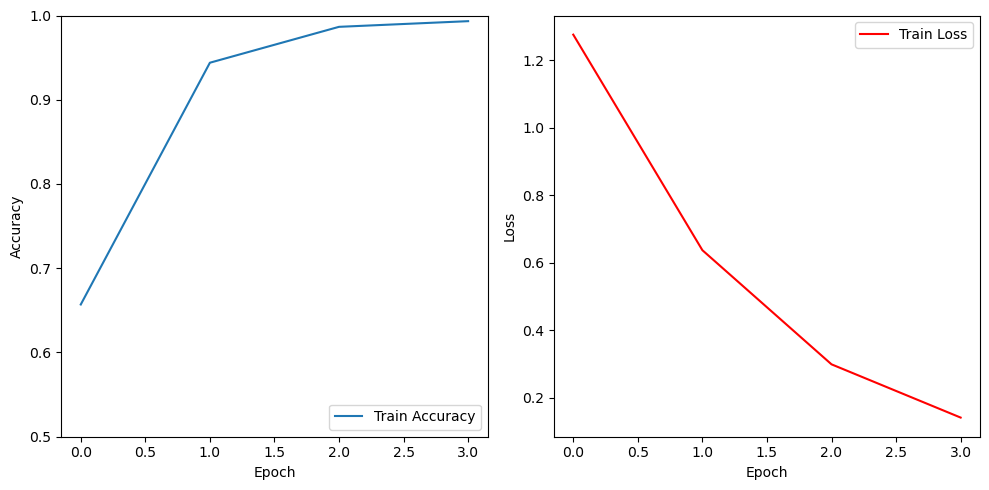

In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from PIL import Image
import matplotlib.pyplot as plt 


class KazNU_Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.classes = []
        self._load_data()

    def _load_data(self):
        for class_name in os.listdir(self.root_dir):
            class_dir = os.path.join(self.root_dir, class_name)
            if os.path.isdir(class_dir):
                self.classes.append(class_name)
                for image_name in os.listdir(class_dir):
                    if image_name.endswith('.jpg'):
                        self.images.append(os.path.join(class_dir, image_name))
                        self.labels.append(class_name)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = self.classes.index(label)
        return image, label


weights = EfficientNet_B0_Weights.DEFAULT
transform = weights.transforms()


train_dataset = KazNU_Dataset(root_dir='/Users/zumagalievamaral/Desktop/kaznu_resized', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = KazNU_Dataset(root_dir='/Users/zumagalievamaral/Desktop/kaznu_resized', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


model = efficientnet_b0(weights=weights)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, len(train_dataset.classes))  # Соңғы қабатты өзгерту

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)


epochs = 4
train_acc = []
train_loss = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = correct / total
    avg_loss = running_loss / len(train_loader)

    train_acc.append(acc)
    train_loss.append(avg_loss)

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Train Acc: {acc:.4f}")


model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"Test Accuracy: {test_acc:.4f}")


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train_loss, 'r', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


In [1]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from torchvision.models import efficientnet_b0, EfficientNet_B0_Weights
from PIL import Image
import matplotlib.pyplot as plt 



class KazNU_Dataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = []
        self.labels = []
        self.classes = []
        self._load_data()

    def _load_data(self):
        for class_name in os.listdir(self.root_dir):
            class_dir = os.path.join(self.root_dir, class_name)
            if os.path.isdir(class_dir):
                self.classes.append(class_name)
                for image_name in os.listdir(class_dir):
                    if image_name.endswith('.jpg'):
                        self.images.append(os.path.join(class_dir, image_name))
                        self.labels.append(class_name)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert('RGB')

        if self.transform:
            image = self.transform(image)

        label = self.classes.index(label)
        return image, label



weights = EfficientNet_B0_Weights.DEFAULT
transform = weights.transforms()

train_dataset = KazNU_Dataset(root_dir='/Users/zumagalievamaral/Desktop/kaznu_resized', transform=transform)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = KazNU_Dataset(root_dir='/Users/zumagalievamaral/Desktop/kaznu_resized', transform=transform)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



model = efficientnet_b0(weights=weights)
num_features = model.classifier[1].in_features
model.classifier[1] = nn.Linear(num_features, len(train_dataset.classes))  # Соңғы қабатты ауыстыру

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)



epochs = 4
train_acc = []
train_loss = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    acc = correct / total
    avg_loss = running_loss / len(train_loader)

    train_acc.append(acc)
    train_loss.append(avg_loss)

    print(f"Epoch {epoch+1}, Loss: {avg_loss:.4f}, Train Acc: {acc:.4f}")



model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        
       
        probabilities = torch.softmax(outputs, dim=1)
        
        _, predicted = torch.max(probabilities, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_acc = correct / total
print(f"Test Accuracy: {test_acc:.4f}")


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(train_loss, 'r', label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


[W NNPACK.cpp:61] Could not initialize NNPACK! Reason: Unsupported hardware.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/zumagalievamaral/Desktop/kaznu_resized/zholdasbekov/IMG_8010.jpg'